In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('./possum (3).csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
data.shape

(104, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
### Filling null values
data.age.fillna(data.age.mean(),inplace=True)
data.footlgth.fillna(data.footlgth.mean(),inplace=True)

In [8]:
data.isnull().mean()

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

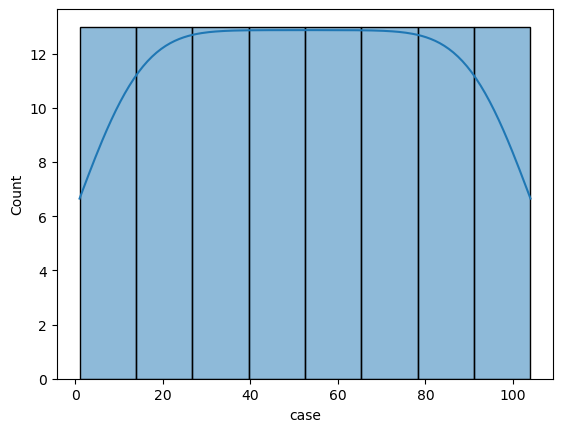

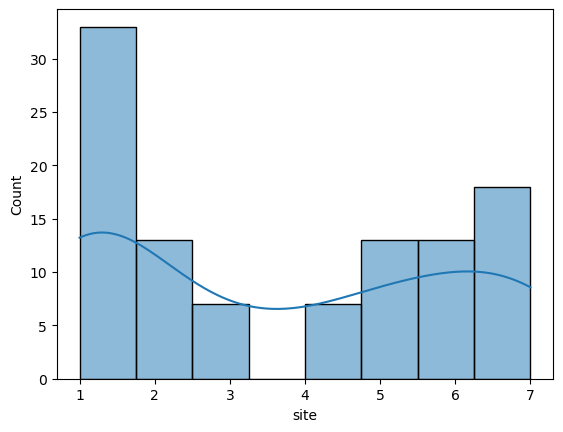

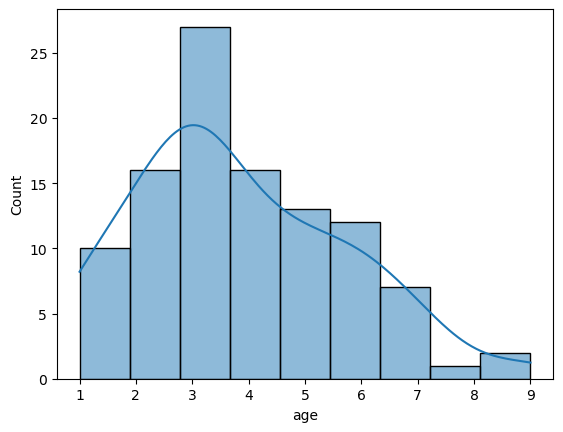

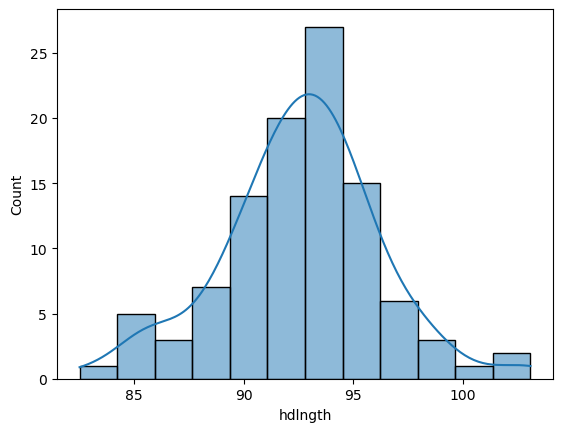

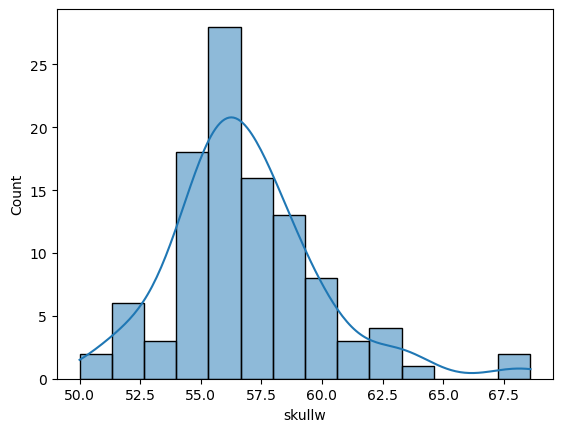

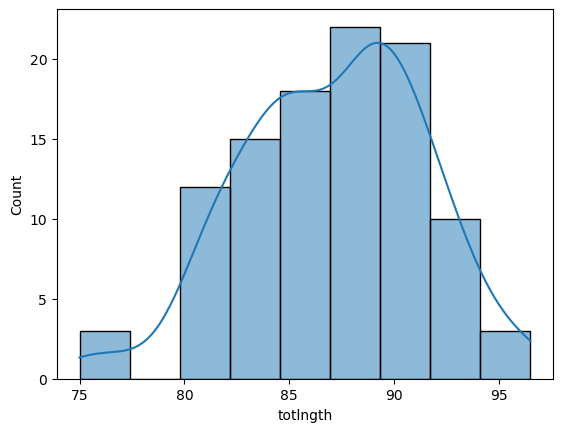

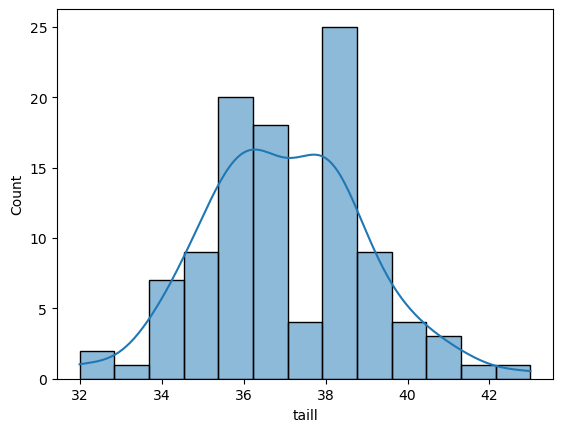

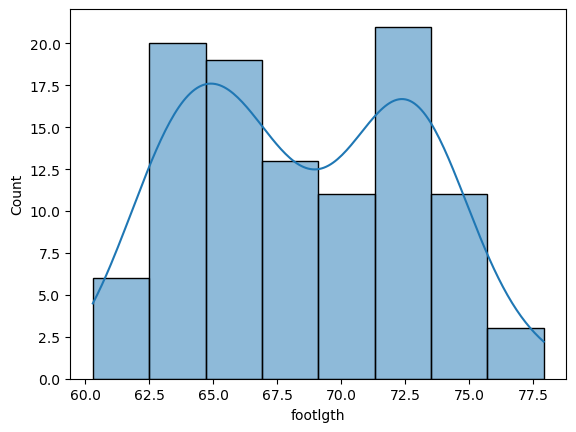

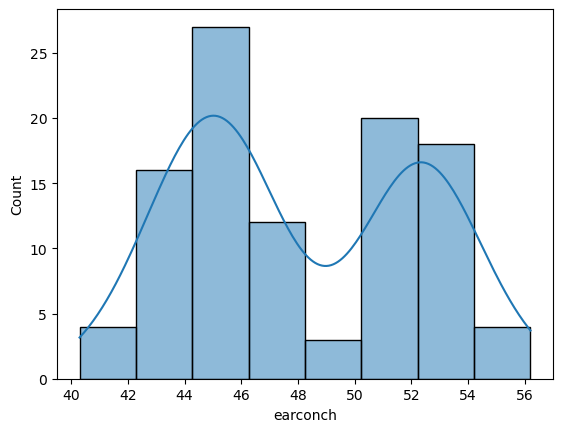

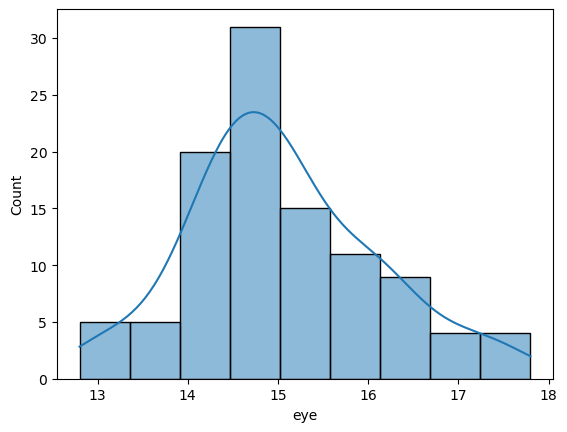

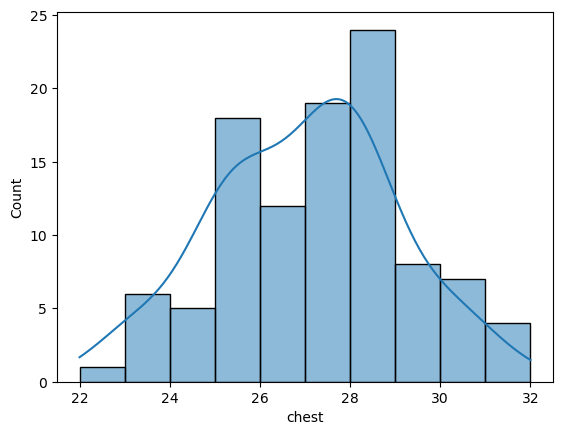

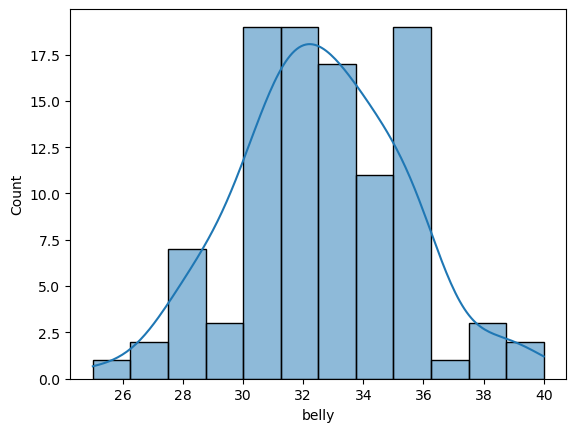

In [9]:
### Univariate analysis
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(data=data,x=data[i],kde=True)
        plt.show()

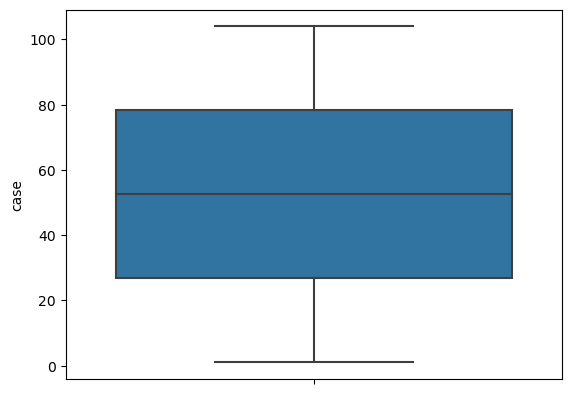

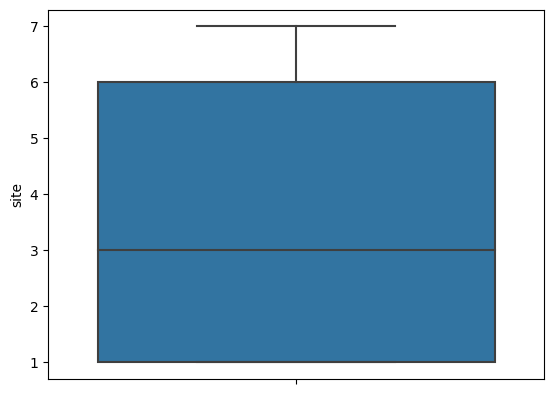

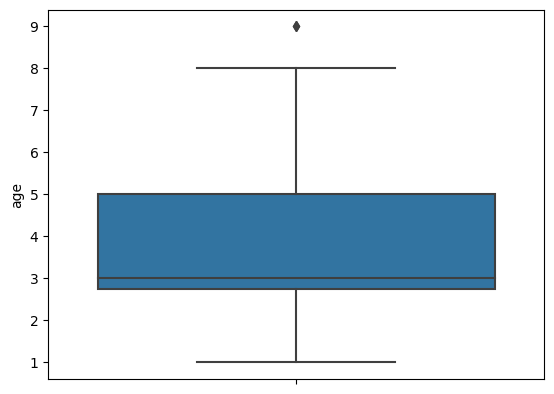

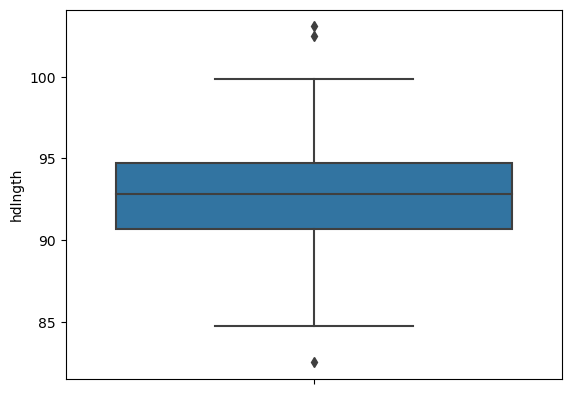

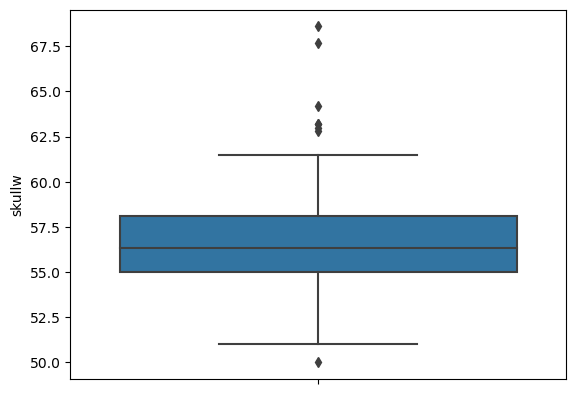

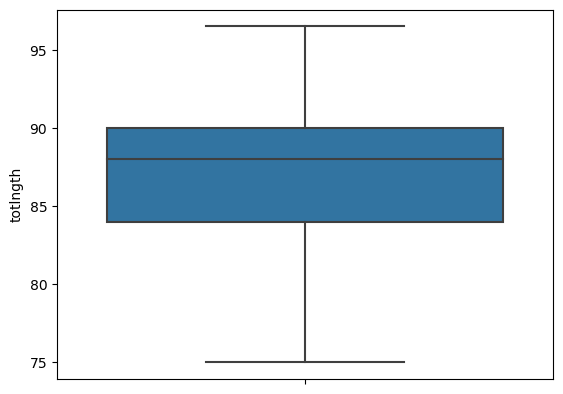

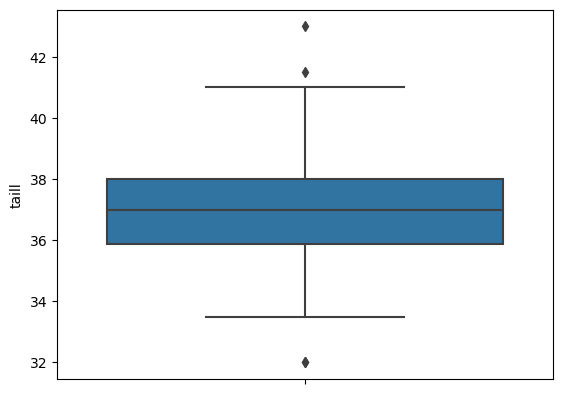

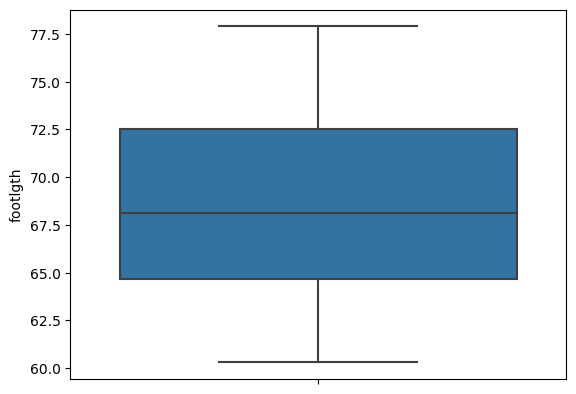

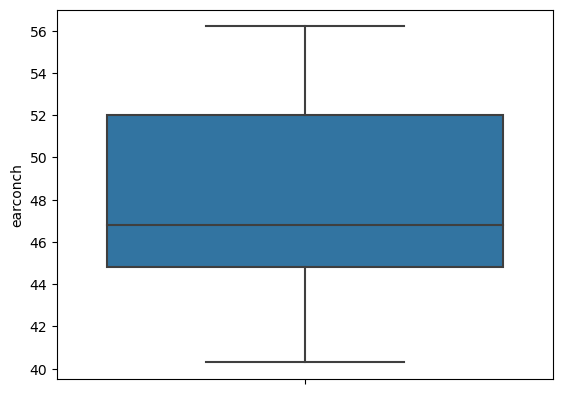

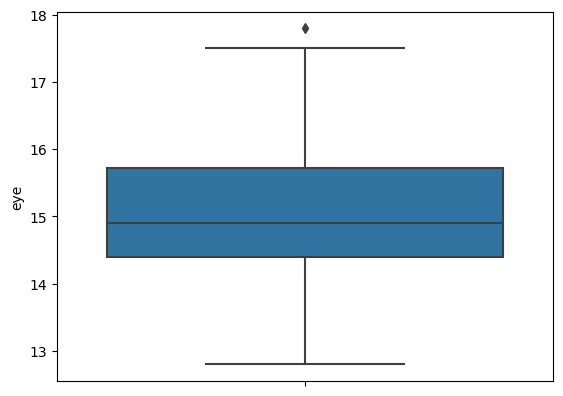

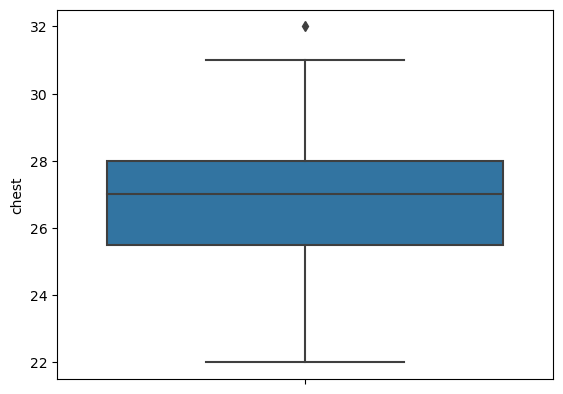

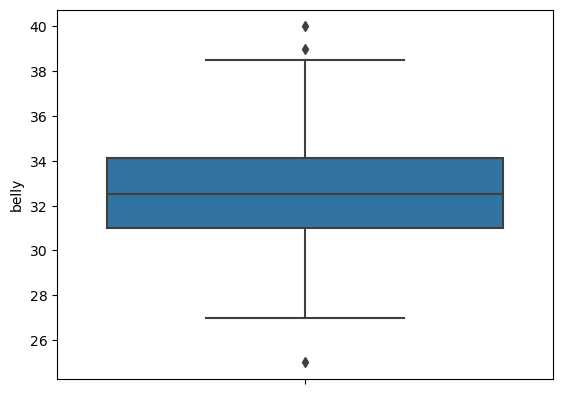

In [10]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(data=data,y=data[i])
        plt.show()

### label encoding

In [11]:
le = LabelEncoder()

In [12]:
data['Pop'] = le.fit_transform(data['Pop'])
data['sex'] = le.fit_transform(data['sex'])

In [13]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [14]:
data.corr()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,0.860281,0.253980,-0.194404,-0.209177,-0.125065,-0.334329,0.315351,-0.781811,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,0.892326,0.232817,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,-0.781171,-0.790716,-0.036987,-0.345494,-0.175266
Pop,0.860281,0.892326,1.000000,0.195811,-0.085747,0.001267,0.065908,-0.078666,0.490856,-0.788286,-0.883293,0.148594,-0.194957,-0.024788
sex,0.253980,0.232817,0.195811,1.000000,-0.063995,0.107200,0.080014,-0.160200,-0.040917,-0.122964,-0.091559,0.188371,-0.139074,-0.090777
age,-0.194404,-0.130799,-0.085747,-0.063995,1.000000,0.311848,0.279955,0.250970,0.117274,0.125314,0.052943,0.234669,0.325303,0.345825
hdlngth,-0.209177,-0.163646,0.001267,0.107200,0.311848,1.000000,0.710827,0.691094,0.287429,0.388941,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.065908,0.080014,0.279955,0.710827,1.000000,0.526413,0.255921,0.275057,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,-0.078666,-0.160200,0.250970,0.691094,0.526413,1.000000,0.565646,0.442866,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.490856,-0.040917,0.117274,0.287429,0.255921,0.565646,1.000000,-0.126235,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.781811,-0.781171,-0.788286,-0.122964,0.125314,0.388941,0.275057,0.442866,-0.126235,1.000000,0.768986,0.005197,0.450590,0.301736


In [15]:
### Outlier treatment - IQR method
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1 -1.5*IQR
    return UL,LL

In [16]:
UL,LL = outlier_limit(data.hdlngth)
data['hdlngth'] = np.where((data.hdlngth>UL)| (data.hdlngth<LL),np.nan,data.hdlngth)

In [17]:
data.dropna(inplace=True)

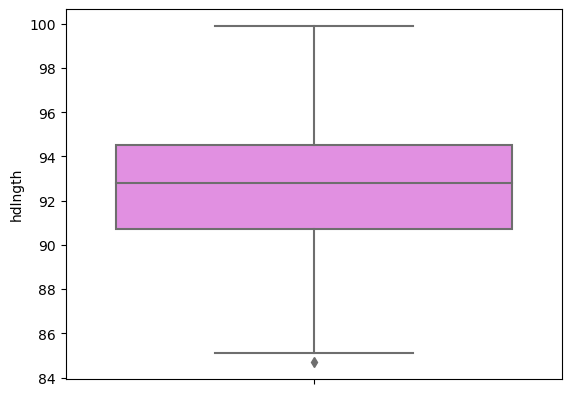

In [18]:
sns.boxplot(y=data.hdlngth,color='Violet')
plt.show()

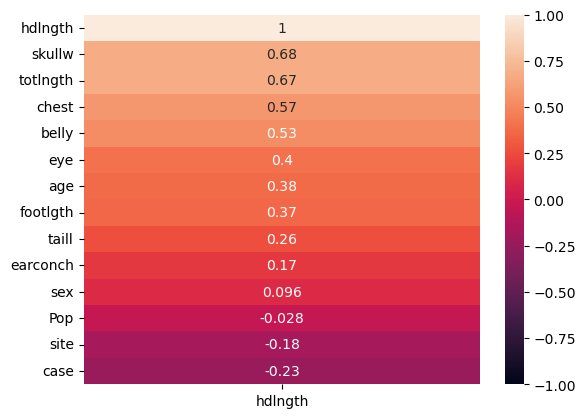

In [19]:
sns.heatmap(data.corr()[["hdlngth"]].sort_values(by="hdlngth",ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

In [20]:
x = data[['skullw', 'totlngth','age', 'eye', 'chest', 'belly']].values

In [21]:
y= data[['hdlngth']].values

In [22]:
### Feature scaling
rs = RobustScaler()

In [23]:
x = rs.fit_transform(x)

In [24]:
### Model building
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "LinearSVR":LinearSVR()
    }

In [25]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [26]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg =np.mean(rmse)
    print("Average rsme :",rmse_avg)
    print("*"*100)

Cross validation model : LinearRegression
Average rsme : 2.0183039659272413
****************************************************************************************************
Cross validation model : Ridge
Average rsme : 2.0129345133932612
****************************************************************************************************
Cross validation model : RandomForestRegressor
Average rsme : 2.059259546669525
****************************************************************************************************
Cross validation model : AdaBoostRegressor
Average rsme : 2.0525502473576425
****************************************************************************************************
Cross validation model : GradientBoostingRegressor
Average rsme : 2.279494561477333
****************************************************************************************************
Cross validation model : DecisionTreeRegressor
Average rsme : 2.9541525986734083
********************************

### Ridge regressor having best oveerall performance

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=55)

In [28]:
R_model = Ridge()

In [29]:
R_model.fit(x_train,y_train)

Ridge()

In [30]:
y_pred = R_model.predict(x_test)

In [31]:
r2_score(y_test,y_pred)

0.599986567659794

In [32]:
R_model.score(x_test,y_test)

0.599986567659794

In [33]:
R_model.score(x_train,y_train)

0.6579911737651782

In [34]:
mean_absolute_error(y_test,y_pred)

1.5798499294112762

In [35]:
mean_squared_error(y_test,y_pred)

4.16451172523583

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.0407135333593076

In [37]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)
Output.head()

,Actual,Prediction
0,92.8,91.481835
1,91.0,90.118070
2,91.5,90.197004
3,89.5,89.001297
4,97.7,92.248295


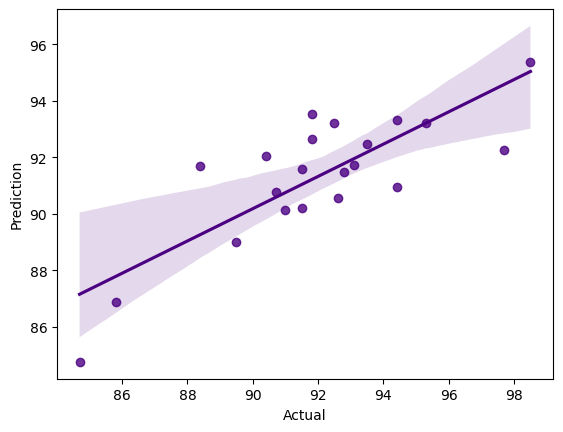

In [38]:
sns.regplot(data=Output,x='Actual',y='Prediction',color='indigo')
plt.show()